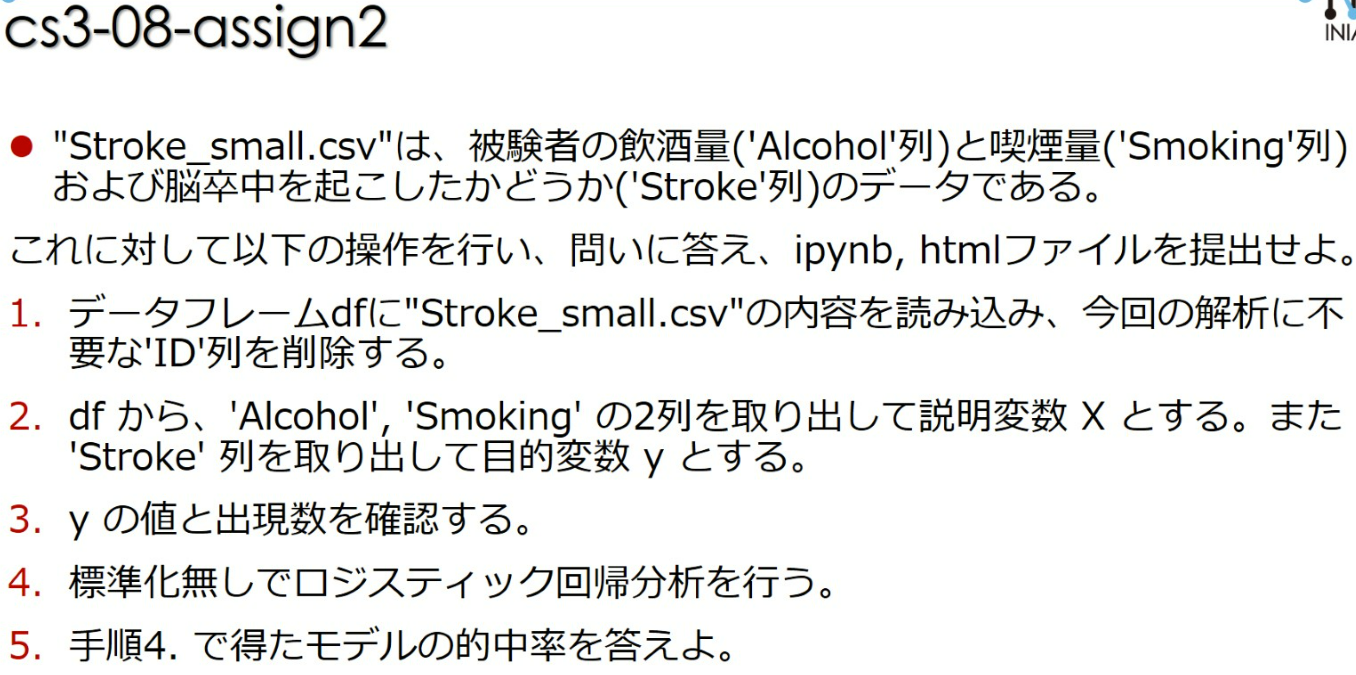
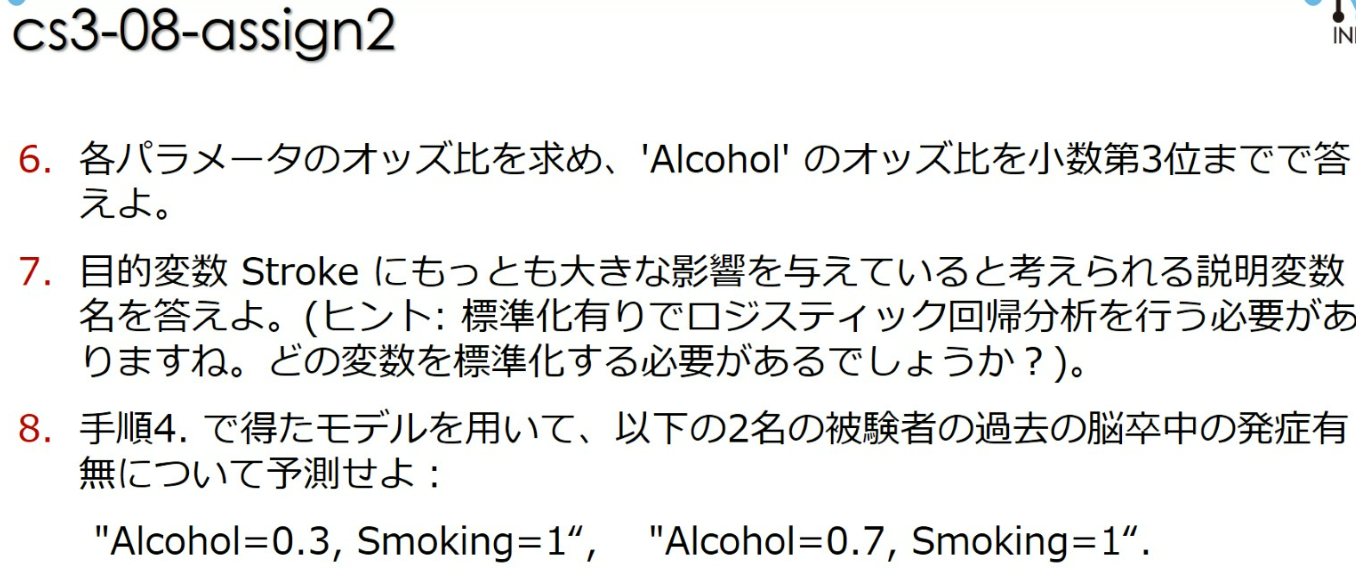

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score

In [2]:
csv_in = 'Stroke_small.csv'
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(20, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       20 non-null     int64  
 1   Alcohol  20 non-null     float64
 2   Smoking  20 non-null     int64  
 3   Stroke   20 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 768.0 bytes
None


,ID,Alcohol,Smoking,Stroke
0,1,1.3,2,1
1,2,0.9,0,0
2,3,0.7,3,1
3,4,0.8,0,0
4,5,1.7,3,1


In [3]:
df = df.drop(columns='ID')

In [4]:
X = df[['Alcohol', 'Smoking']]
#X = df.drop(columns='Stroke')
y= df['Stroke']
print('X:', X.shape)
display(X.head())
print('y:', y.shape)
print(y.head())

X: (20, 2)


,Alcohol,Smoking
0,1.3,2
1,0.9,0
2,0.7,3
3,0.8,0
4,1.7,3


y: (20,)
0    1
1    0
2    1
3    0
4    1
Name: Stroke, dtype: int64


In [5]:
print(y.value_counts())

0    11
1     9
Name: Stroke, dtype: int64


In [6]:
X_c = sm.add_constant(X)
model = sm.Logit(y, X_c)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.465424
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Stroke   No. Observations:                   20
Model:                          Logit   Df Residuals:                       17
Method:                           MLE   Df Model:                            2
Date:                Mon, 31 Jul 2023   Pseudo R-squ.:                  0.3236
Time:                        02:48:33   Log-Likelihood:                -9.3085
converged:                       True   LL-Null:                       -13.763
Covariance Type:            nonrobust   LLR p-value:                   0.01163
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7878      2.005     -1.390      0.164      -6.718       1.143
Alcohol        0.3945      1.

In [7]:
y_pred = results.predict(X_c)
print('Predicted y:')
print(y_pred.head())
y_pred_bin = (y_pred >= 0.5).astype('int')
print(y_pred_bin.head())

Predicted y:
0    0.583928
1    0.080715
2    0.803621
3    0.077835
4    0.858590
dtype: float64
0    1
1    0
2    1
3    0
4    1
dtype: int32


In [8]:
acc = accuracy_score(y, y_pred_bin)
print('Hitting ratio:', acc)

Hitting ratio: 0.85


In [9]:
print('Odds ratio')
print(np.exp(results.params))

Odds ratio
const      0.061559
Alcohol    1.483704
Smoking    3.694664
dtype: float64


In [10]:
# NOTE: make DataFrame corresponding to X_scaled_ar
X_scaled_ar = scale(X)
X_scaled = pd.DataFrame(X_scaled_ar, columns=X.columns)
X_scaled_c = sm.add_constant(X_scaled)
model = sm.Logit(y, X_scaled_c)
results_scaled = model.fit()
print(results_scaled.summary())

Optimization terminated successfully.
         Current function value: 0.465424
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Stroke   No. Observations:                   20
Model:                          Logit   Df Residuals:                       17
Method:                           MLE   Df Model:                            2
Date:                Mon, 31 Jul 2023   Pseudo R-squ.:                  0.3236
Time:                        02:49:05   Log-Likelihood:                -9.3085
converged:                       True   LL-Null:                       -13.763
Covariance Type:            nonrobust   LLR p-value:                   0.01163
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3382      0.590     -0.573      0.567      -1.495       0.818
Alcohol        0.1520      0.

In [13]:
print(results_scaled.params.sort_values(key=np.abs, ascending=False))

Smoking    1.573703
const     -0.338199
Alcohol    0.151988
dtype: float64


In [14]:

X_test = pd.DataFrame([ [0.3, 1],
                        [0.7, 1],
                      ], columns=X.columns)  # example

In [15]:
X_test_c = sm.add_constant(X_test, has_constant='add')
display(X_test_c)
y_test = results.predict(X_test_c)
print('Predicted y:')
print(y_test)

,const,Alcohol,Smoking
0,1.0,0.3,1
1,1.0,0.7,1


Predicted y:
0    0.203832
1    0.230641
dtype: float64
